# 9.支持向量机

## 9.1  最大间隔分类器

### 9.1.1 超平面

### “如何用一条线把两类不同的点分开？”

超平面的数学定义非常简单。在二维空间中，超平面由如下方程定义：

$$
\beta_0 + \beta_1 X_1 + \beta_2 X_2 = 0
$$


公式（9.1）可以很容易推广到 $p$ 维空间：

$$
\beta_0 + \beta_1 X_1 + \beta_2 X_2 + \cdots + \beta_p X_p = 0
$$


### 9.1.2 使用分隔超平面进行分类 

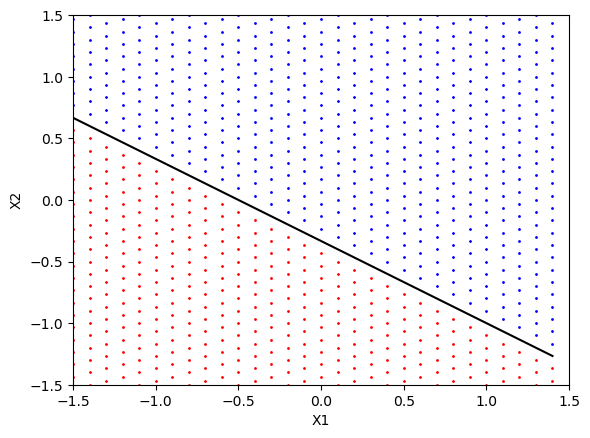

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

x=np.arange(-1.5,1.5,0.1)

y1=-1/3*(1+2*x)

for i in np.arange(0.1,10,0.1):
    y2=-1/3*(1+2*x)+i
    y3=-1/3*(1+2*x)-i
    plt.scatter(x,y2,c='b',s = 1)
    plt.scatter(x,y3,c='r',s = 1)
    
plt.plot(x,y1,c='black')

axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plt.grid(False)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

图中展示了一个超平面：

$$
1 + 2X_1 + 3X_2 = 0
$$

这是一条线（在二维空间中），把空间分成两个区域：

- 上半部分（蓝色）：满足 $1 + 2X_1 + 3X_2 > 0$，表示一类。
- 下半部分（红色）：满足 $1 + 2X_1 + 3X_2 < 0$，表示另一类。


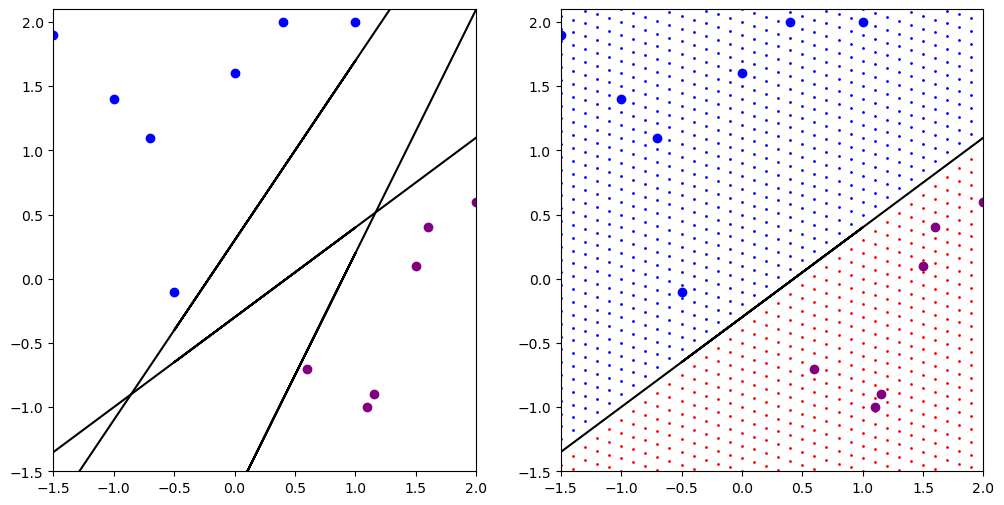

In [3]:
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(1,2,1) 
ax2 = fig.add_subplot(1,2,2) 

df = pd.read_excel(r'D:\zlyj\1.xlsx')

ax1.scatter(df['X1'].head(11),df['X2'].head(11),c='blue')
ax1.scatter(df['X1'].tail(11),df['X2'].tail(11),c='purple')

y=df['X1']*0.7-0.3
y1=df['X1']*1.9-1.7
y2=df['X1']*1.4+0.3

ax1.plot(df.X1,y,c='black')
ax1.plot(df.X1,y1,c='black')
ax1.plot(df.X1,y2,c='black')

ax1.set_xlim(-1.5, 2)
ax1.set_ylim(-1.5, 2.1)

x=np.arange(-2,2,0.1)
for i in np.arange(0.1,10,0.1):
    y3=x*0.7-0.3+i
    y4=x*0.7-0.3-i
    plt.scatter(x,y3,c='b',s = 1)
    plt.scatter(x,y4,c='r',s = 1)
    
ax2.scatter(df['X1'].head(11),df['X2'].head(11),c='blue')
ax2.scatter(df['X1'].tail(11),df['X2'].tail(11),c='purple')
ax2.plot(df.X1,y,c='black')

ax2.set_xlim(-1.5, 2)
ax2.set_ylim(-1.5, 2.1)

plt.show()
import warnings
warnings.filterwarnings("ignore")

如果我们真的找到了这样一个能把所有点都分开的“完美的超平面”，那么对任意样本 $x_i$，有：

- 对于蓝色点（设为 $y_i = 1$）：

  $$
  \beta_0 + \beta_1 x_{i1} + \cdots + \beta_p x_{ip} > 0
  $$

- 对于红色点（设为 $y_i = -1$）：

  $$
  \beta_0 + \beta_1 x_{i1} + \cdots + \beta_p x_{ip} < 0
  $$

合在一起可以简写为：

$$
y_i \left( \beta_0 + \beta_1 x_{i1} + \cdots + \beta_p x_{ip} \right) > 0
$$

这就是我们用数学语言表达的“这条线可以完美分开两类数据”。


### 9.1.3 最大间隔分类器

最大间隔分类器就是那条离所有点“最近的那个点”的距离最大的分隔线。

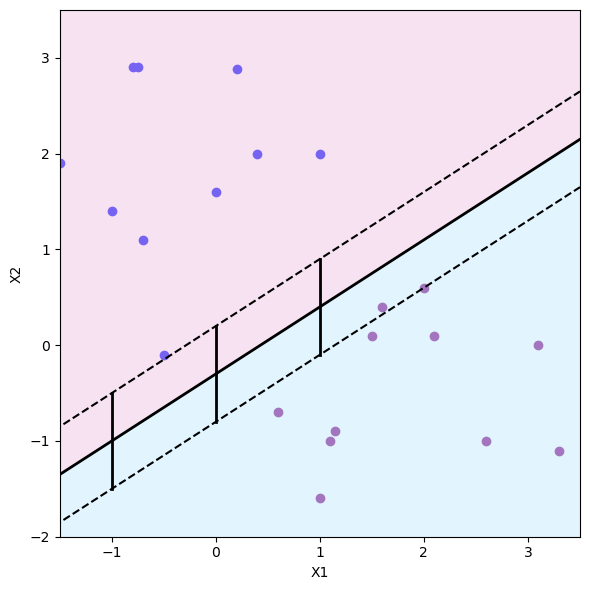

In [4]:
# 分成两类
class1 = df.iloc[:11]
class2 = df.iloc[11:]

# 决策边界函数
def decision_boundary(x):
    return 0.7 * x - 0.3

margin = 0.5  # 间隔宽度

# 创建单图
fig, ax = plt.subplots(figsize=(6, 6))

# 分类点
ax.scatter(class1['X1'], class1['X2'], c='blue')
ax.scatter(class2['X1'], class2['X2'], c='purple')

# 绘制主分隔线和两条间隔边界线
x_vals = np.linspace(-2, 3.5, 100)
ax.plot(x_vals, decision_boundary(x_vals), c='black', linewidth=2)
ax.plot(x_vals, decision_boundary(x_vals) + margin, c='black', linestyle='dashed')
ax.plot(x_vals, decision_boundary(x_vals) - margin, c='black', linestyle='dashed')

# 背景颜色区域
x_fill, y_fill = np.meshgrid(np.linspace(-2, 3.5, 300), np.linspace(-2, 3.5, 300))
Z = 0.7 * x_fill - 0.3 - y_fill
ax.contourf(x_fill, y_fill, Z > 0, levels=1, colors=['#eec7e5', '#c7eafc'], alpha=0.5)

# 间隔带中几条垂直线，模拟支持向量间隔
support_x = [-1, 0, 1]
for x in support_x:
    y_top = decision_boundary(x) + margin
    y_bottom = decision_boundary(x) - margin
    ax.plot([x, x], [y_bottom, y_top], c='black', linewidth=2)

# 坐标轴范围与标签
ax.set_xlim(-1.5, 3.5)
ax.set_ylim(-2, 3.5)
ax.set_xlabel('X1')
ax.set_ylabel('X2')

plt.tight_layout()
plt.show()

- 中间那条实线就是最大间隔超平面。
- 两边的虚线表示“间隔范围”。
- 有三点（两个蓝点一个紫点）刚好落在虚线上，它们离中间线最近。它们被称为：**支持向量**

这些点决定了这条线的位置！


### 9.1.4 不可分情况

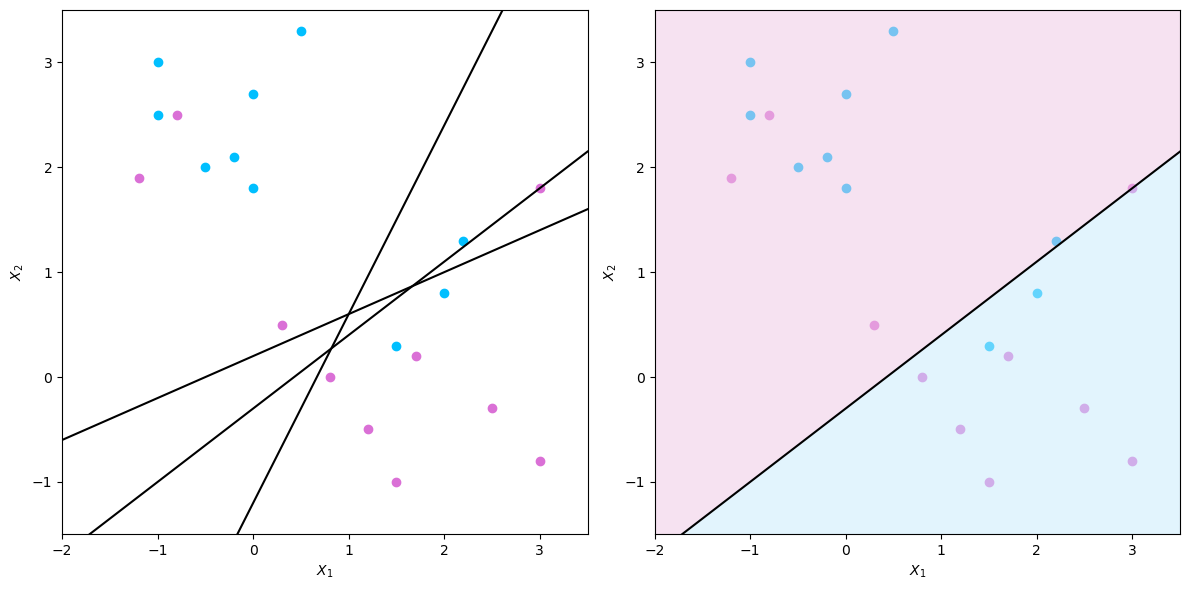

In [5]:
df = pd.read_excel(r'D:\zlyj\data1.xlsx')

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.scatter(df[df['label'] == 1]['X1'], df[df['label'] == 1]['X2'], c='deepskyblue')
ax1.scatter(df[df['label'] == -1]['X1'], df[df['label'] == -1]['X2'], c='orchid')

x_vals = np.linspace(-2, 3.5, 100)
ax1.plot(x_vals, 0.7 * x_vals - 0.3, c='black')     # 中间线
ax1.plot(x_vals, 1.8 * x_vals - 1.2, c='black')     # 倾斜更陡
ax1.plot(x_vals, 0.4 * x_vals + 0.2, c='black')     # 倾斜更缓

ax1.set_xlim(-2, 3.5)
ax1.set_ylim(-1.5, 3.5)
ax1.set_xlabel(r'$X_1$')
ax1.set_ylabel(r'$X_2$')

ax2.scatter(df[df['label'] == 1]['X1'], df[df['label'] == 1]['X2'], c='deepskyblue')
ax2.scatter(df[df['label'] == -1]['X1'], df[df['label'] == -1]['X2'], c='orchid')


ax2.plot(x_vals, 0.7 * x_vals - 0.3, c='black')

x_fill, y_fill = np.meshgrid(np.linspace(-2, 3.5, 300), np.linspace(-1.5, 3.5, 300))
Z = 0.7 * x_fill - 0.3 - y_fill
ax2.contourf(x_fill, y_fill, Z > 0, levels=1, colors=['#eec7e5', '#c7eafc'], alpha=0.5)

ax2.set_xlim(-2, 3.5)
ax2.set_ylim(-1.5, 3.5)
ax2.set_xlabel(r'$X_1$')
ax2.set_ylabel(r'$X_2$')

plt.tight_layout()
plt.show()


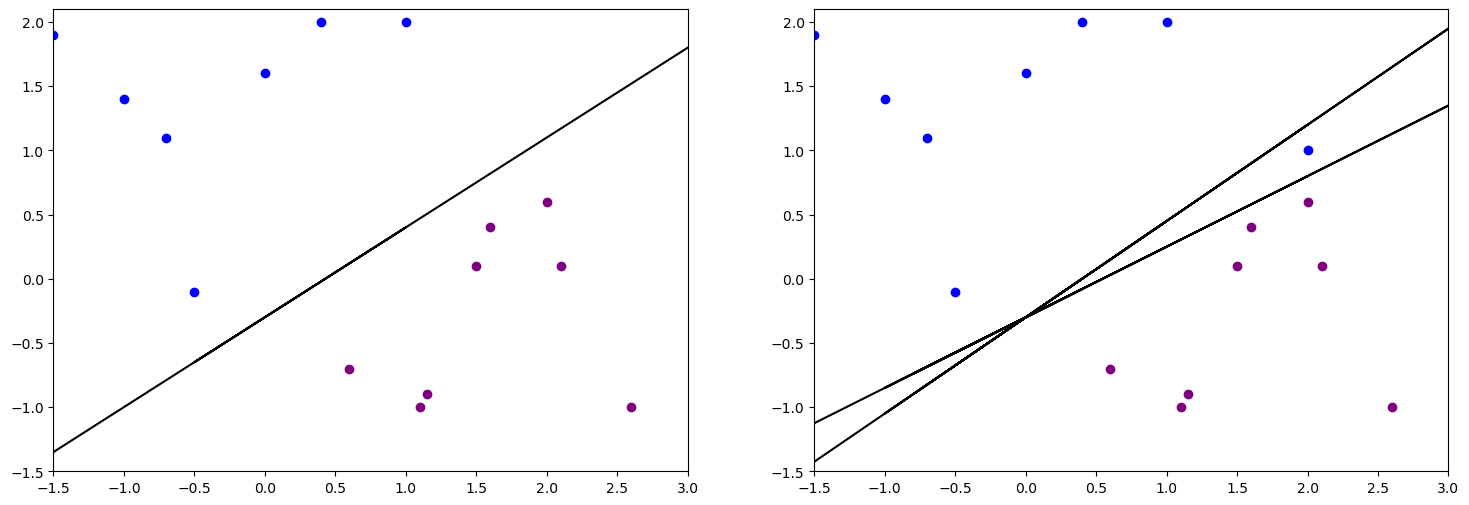

In [6]:
fig = plt.figure(figsize=(18, 6))
ax1 = fig.add_subplot(1,2,1) 
ax2 = fig.add_subplot(1,2,2) 

df = pd.read_excel(r'D:\zlyj\1.xlsx')

ax1.scatter(df['X1'].head(11),df['X2'].head(11),c='blue')
ax1.scatter(df['X1'].tail(11),df['X2'].tail(11),c='purple')

y=df['X1']*0.7-0.3

ax1.plot(df.X1,y,c='black')

ax1.set_xlim(-1.5, 3)
ax1.set_ylim(-1.5, 2.1)

df1=df.copy()
df1.loc[22]=[2,1,1]
df1=df1.sort_values('label',ascending=False)
df1=df1.reset_index()

ax2.scatter(df1['X1'].head(12),df1['X2'].head(12),c='blue')
ax2.scatter(df1['X1'].tail(11),df1['X2'].tail(11),c='purple')

y=df1['X1']*0.75-0.3

ax2.plot(df1.X1,y,c='black')

y1=df1['X1']*0.55-0.3

ax2.plot(df1.X1,y1,c='black')

ax2.set_xlim(-1.5, 3)
ax2.set_ylim(-1.5, 2.1)

plt.show()

最大间隔分类器虽然理论上很棒，但现实中很多数据不能完全分开。这时候我们就需要下一种更强大的方法：支持向量分类器，它允许“适度犯错”，更贴近真实场景。
-  问题一：现实中很多数据不可完全分开
-  问题二：即便可以分开，模型也太敏感了

## 9.2  支持向量分类器

**目标：**

$$
\max M
$$

**约束条件：**

1. 固定超平面的“方向长度”：

   $$
   \sum_{j=1}^{p} \beta_j^2 = 1
   $$

2. 所有点到超平面要满足间隔要求，**但允许误差**：

   $$
   y_i (\beta_0 + \beta_1 x_{i1} + \cdots + \beta_p x_{ip}) \geq M(1 - \epsilon_i)
   $$

3. 所有误差不能太大，总体有“预算”限制：

   $$
   \epsilon_i \geq 0,\quad \sum_{i=1}^{n} \epsilon_i \leq C
   $$


4. **εᵢ：松弛变量（slack variable）**

- 表示第 *i* 个点**偏离间隔的程度**
- 如果 εᵢ = 0：点在“正确边界之外”，完美
- 如果 0 < εᵢ ≤ 1：点在边界内，但分类仍对
- 如果 εᵢ > 1：点**被分类错了！**

  **C：调节参数（tuning parameter）**

- 限制总误差容忍度
- 可理解为你愿意让多少点“违反规则”


Training score is  0.9545454545454546
Test score is  1.0


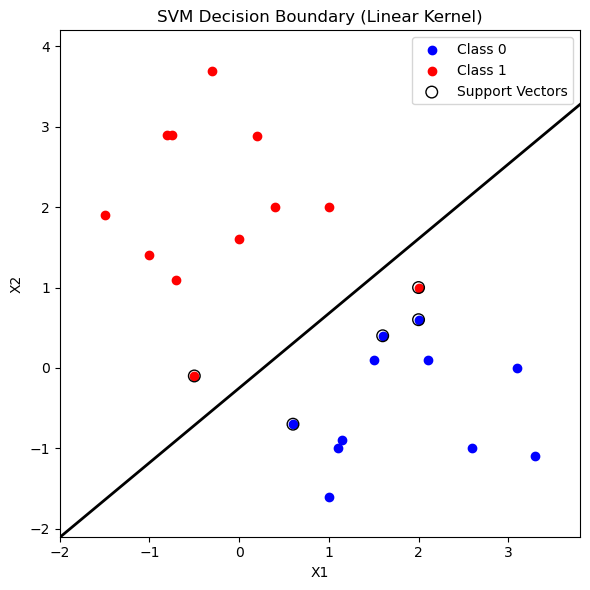

In [7]:
import pandas as pd
import numpy as np

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV,train_test_split,cross_val_score
from mlxtend.plotting import plot_decision_regions


import matplotlib.pyplot as plt
import seaborn as sns

import warnings

data=df1.copy()
data['y'] = 1*(data['label']>0)
data.drop(['label','index'], axis = 1,inplace=True)

X_train,X_test,y_train,y_test = train_test_split(data.drop('y',axis=1),data['y'],test_size = 1,random_state = 1)

svc = SVC(kernel = 'linear',C=1)
svc.fit(X_train,y_train)
print('Training score is ',svc.score(X_train,y_train))
print('Test score is ',svc.score(X_test,y_test))

plt.figure(figsize=(6, 6))
data0 = data[data['y'] == 0]
data1 = data[data['y'] == 1]
plt.scatter(data0['X1'], data0['X2'], color='blue', label='Class 0')
plt.scatter(data1['X1'], data1['X2'], color='red', label='Class 1')

# 支持向量（空心黑圈）
plt.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1],
            s=70, facecolors='none', edgecolors='k', label='Support Vectors')

# 决策边界
w = svc.coef_[0]
b = svc.intercept_[0]
x_vals = np.linspace(data['X1'].min() - 0.5, data['X1'].max() + 0.5, 500)
y_vals = -(w[0] * x_vals + b) / w[1]
plt.plot(x_vals, y_vals, 'k-', linewidth=2)

# 图形设置
plt.xlabel('X1')
plt.ylabel('X2')
plt.xlim(data['X1'].min() - 0.5, data['X1'].max() + 0.5)
plt.ylim(data['X2'].min() - 0.5, data['X2'].max() + 0.5)
plt.title('SVM Decision Boundary (Linear Kernel)')
plt.legend()
plt.tight_layout()
plt.show()

- 有些点在边界内，但分类正确
- 有些点甚至在错误一边
- 支持向量分类器允许这些情况存在，而不是像最大间隔分类器那样“零容忍”。

## 9.3 支持向量机

### 9.3.1 非线性决策边界分类

前面讲的支持向量分类器（SVC）有一个前提：

> **它只能画“直线”或“平面”来分数据。**

但现实中很多分类问题是这样的：

- 类别之间的边界是**弯曲的、环状的、复杂的非线性形状**
- 如果你硬要用一条直线来分，只能**分得非常差**


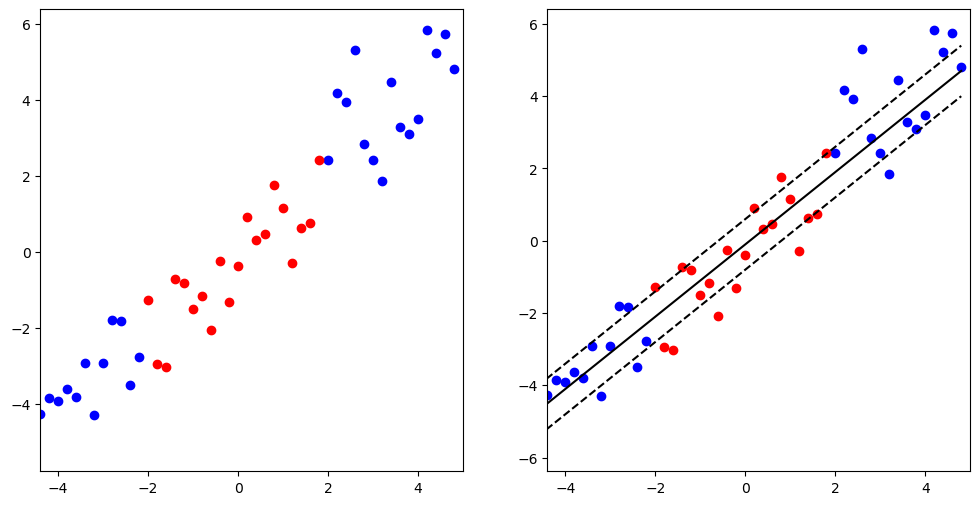

In [7]:
import pandas as pd
import numpy as np

X1=np.arange(-5,5,0.2)
e=np.random.normal(0,1,50)
X2=X1+e
df=pd.DataFrame({'X1':X1,'X2':X2})
df['y']=0
df.loc[df['X1']>-2,'y']=1
df.loc[df['X1']>2,'y']=0

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(1,2,1) 
ax2 = fig.add_subplot(1,2,2) 

df1=df[df['y']==0]
df2=df[df['y']==1]

ax1.scatter(df1['X1'],df1['X2'],c='blue')
ax1.scatter(df2['X1'],df2['X2'],c='red')

ax1.set_xlim(-4.4, 5)
ax1.set_xlim(-4.4, 5)

ax2.scatter(df1['X1'],df1['X2'],c='blue')
ax2.scatter(df2['X1'],df2['X2'],c='red')


y=df['X1']-0.1
ax2.plot(df.X1,y,c='black')

y1=df['X1']-0.8
ax2.plot(df.X1,y1,c='black',linestyle="--")

y2=df['X1']+0.6
ax2.plot(df.X1,y2,c='black',linestyle="--")

ax2.set_xlim(-4.4, 5)
ax2.set_xlim(-4.4, 5)

import warnings
warnings.filterwarnings("ignore")

plt.show()

**把数据映射到更高维空间，在那里它们就“线性可分”了！**

比如原始特征是：

$$
X_1, X_2, \ldots, X_p
$$

我们可以变成更高维的特征：

$$
X_1, X_1^2, X_2, X_2^2, \ldots, X_p, X_p^2
$$

现在你从二维空间跳到四维空间 —— 原本“弯弯绕绕”的边界，在高维里就可能变成“直线”。


支持向量分类器只能处理直线边界，而支持向量机（SVM）通过引入非线性特征，让我们能画出弯曲的分类边界，从而解决更复杂的问题。

### 9.3.2 支持向量机

 *不用真的把数据映射到高维空间，而是用“核函数”来间接地完成这个操作。*

1. 我们先回顾线性支持向量分类器最终的形式是：

$$
f(x) = \beta_0 + \sum_{i=1}^{n} \alpha_i \langle x, x_i \rangle
$$

  其中：

- $\alpha_i$ 是参数（多数为 0，只对支持向量非零）
- $\langle x, x_i \rangle$ 是点积（衡量两个点的“相似度”）

 实际上我们只需计算这些点积，不需要显式用到 $\beta_j$。


2. **核函数（Kernel Function）**

点积可以替换为更一般的形式：

$$
K(x, x_i)
$$

这就是**核函数**，它衡量两个点的相似性。不同的核函数就能产生不同的分类边界。

---

3. **不同的核函数类型**

① 线性核（Linear Kernel）：

$$
K(x, x_i) = \sum x_j x_{ij} \quad \text{(9.21)}
$$

→ 就是最原始的点积，用于线性分类器。
② 多项式核（Polynomial Kernel）：

$$
K(x, x_i) = \left(1 + \sum x_j x_{ij} \right)^d \quad \text{(9.22)}
$$

- 可以理解为“自动加入高阶多项式项”
- 比如三次核（$d=3$）就等于手动加立方项

 在非线性数据中，多项式核比线性模型更有效。

---

③ 径向基核（Radial Kernel / RBF）：

$$
K(x, x_i) = \exp \left( -\gamma \sum (x_j - x_{ij})^2 \right) \quad \text{(9.24)}
$$

- 这是一个非常强大的非线性核
- 它根据“距离”来判断两个点是否相似
  - 距离越近 → 相似度越大（指数函数放大）



Training score is 1.0
Test score is 0.9333333333333333


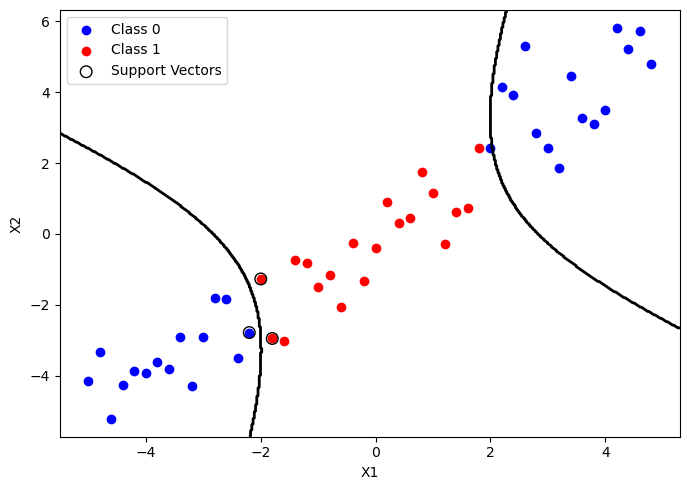

In [8]:
data = df.copy()

# 划分训练测试
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('y', axis=1), data['y'], test_size=0.3, random_state=1)

# 多项式核 SVM 模型
svc = SVC(kernel='poly', degree=2, gamma='auto', C=10)
clf = svc.fit(X_train, y_train)

print('Training score is', svc.score(X_train, y_train))
print('Test score is', svc.score(X_test, y_test))

# 分类绘图（不使用plot_decision_regions）
fig, ax = plt.subplots(figsize=(7, 5))

# 分类点：蓝色 = 0 类，红色 = 1 类
df0 = data[data['y'] == 0]
df1 = data[data['y'] == 1]

ax.scatter(df0['X1'], df0['X2'], color='blue', label='Class 0')
ax.scatter(df1['X1'], df1['X2'], color='red', label='Class 1')

# 生成网格并预测分类结果
x_min, x_max = data['X1'].min() - 0.5, data['X1'].max() + 0.5
y_min, y_max = data['X2'].min() - 0.5, data['X2'].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 决策边界（不画背景色，只画线）
ax.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=2)

# 支持向量点（空心黑圈）
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
           s=70, facecolors='none', edgecolors='k', label='Support Vectors')

# 设置图形样式
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.legend()
plt.tight_layout()
plt.show()


Training score is 1.0
Test score is 0.9333333333333333


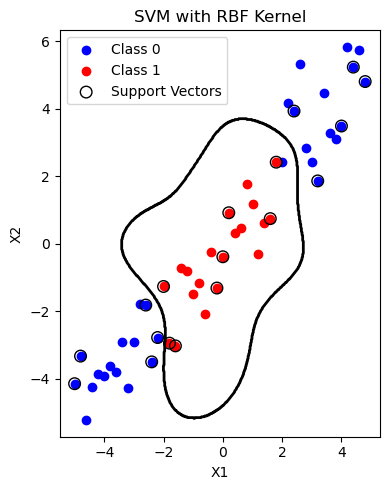

In [9]:
data = df.copy()

# 划分训练/测试集
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('y', axis=1), data['y'], test_size=0.3, random_state=1)

# RBF 核 SVM 模型
svc = SVC(kernel='rbf', degree=3, gamma='auto', C=5)
clf = svc.fit(X_train, y_train)

print('Training score is', svc.score(X_train, y_train))
print('Test score is', svc.score(X_test, y_test))

# 开始绘图
plt.figure(figsize=(4, 5))

# 两类点（蓝：0，红：1）
data0 = data[data['y'] == 0]
data1 = data[data['y'] == 1]

plt.scatter(data0['X1'], data0['X2'], color='blue', label='Class 0')
plt.scatter(data1['X1'], data1['X2'], color='red', label='Class 1')

# 支持向量（空心黑边）
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=70, facecolors='none', edgecolors='k', label='Support Vectors')

# 绘制决策边界（RBF 核是非线性的）
x_min, x_max = data['X1'].min() - 0.5, data['X1'].max() + 0.5
y_min, y_max = data['X2'].min() - 0.5, data['X2'].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=2)

# 图像样式设置
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.title('SVM with RBF Kernel')
plt.tight_layout()
plt.show()

### 9.3.3 心脏病数据的应用

In [10]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import SVC
from sklearn.metrics import roc_curve,roc_auc_score

import matplotlib.pyplot as plt

我们要预测一个人是否患有心脏病，使用的数据来自医学领域，包含 13 个特征（如年龄、性别、胆固醇等）

In [11]:
data = pd.read_csv('D:\zlyj\Heart.csv',index_col=0)
print(data.shape)
data.head()

(303, 14)


,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [12]:
#去除缺失值 转换文本变量
data.dropna(inplace = True)

data['ChestPain'] = data['ChestPain'].map({'typical':1, 'asymptomatic':2, 'nonanginal':3, 'nontypical':4})
data['Thal'] = data['Thal'].map({'fixed':1, 'normal':2, 'reversable':3})
data['AHD'] = data['AHD'].map({'Yes':1,'No':0})
data.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,1,0
2,67,1,2,160,286,0,2,108,1,1.5,2,3.0,2,1
3,67,1,2,120,229,0,2,129,1,2.6,2,2.0,3,1
4,37,1,3,130,250,0,0,187,0,3.5,3,0.0,2,0
5,41,0,4,130,204,0,2,172,0,1.4,1,0.0,2,0


In [13]:
# 划分训练集和测试集
X_train,X_test,y_train,y_test = train_test_split(data.drop('AHD',axis=1),data['AHD'],test_size = 0.3,random_state = 0)
print(X_train.shape,X_test.shape)

(207, 13) (90, 13)


数据处理后有：

- 297 名被试

- 207 人用作训练（train）

- 90 人用作测试（test）

###  方法对比：SVC vs LDA vs SVM

使用三种模型来做二分类：

1. **LDA（线性判别分析）**

2. **支持向量分类器（SVC）**：本质上是 SVM 使用了一个**线性核**（即多项式核 $d = 1$）

3. **支持向量机（SVM）**：使用了**径向基核函数（RBF）**，并尝试不同的 $\gamma$ 值（调节分类边界复杂度）


In [14]:
# 用LDA拟合训练样本
lda = LDA()
lda.fit(X_train,y_train)

lda_probs = lda.predict_proba(X_train)[:,1]
fpr_lda, tpr_lda, _ = roc_curve(y_train, lda_probs) #假阳率和真阳率

In [15]:
#  用支持向量分类器（SVC）拟合训练样本
# 支持向量分类器（SVC）等价于使用d=1的多项式核函数的支持向量机。
svc = SVC(kernel='linear',degree = 1,C=10,probability=True) #probability = True表明我们需要模型预测的分类概率，用来计算fpr和tpr
                                                    
svc.fit(X_train,y_train)

svc_probs = svc.predict_proba(X_train)[:,1]
fpr_svc, tpr_svc, _ = roc_curve(y_train, svc_probs)

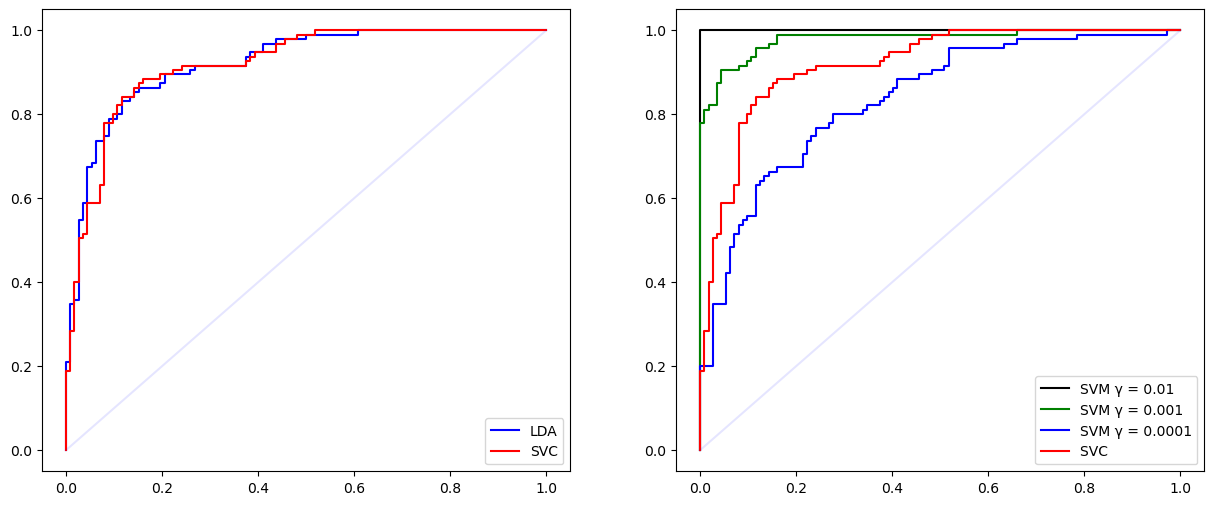

In [16]:
#将LDA和SVC进行对比
fig=plt.figure(figsize = (15,6))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)

ax1.plot(fpr_lda,tpr_lda,label="LDA",c = 'b')
ax1.plot(fpr_svc,tpr_svc,label="SVC",c = 'r')
ax1.plot([0,1],[0,1],alpha = 0.1,c = 'b')

ax1.legend(loc=4)


#将支持向量分类器（SVC）与高斯径向基核函数的支持向量机（SVM）进行对比，gamma分别取0.01，0.001，0.0001
fpr_list = []
tpr_list = []
for c in [0.01,0.001,0.0001]:
    svm = SVC(kernel='rbf',probability=True,gamma=c,C=10)
    svm.fit(X_train,y_train)
    

    svm_probs = svm.predict_proba(X_train)[::,1]
    fpr, tpr, _ = roc_curve(y_train, svm_probs)
    fpr_list.append(fpr)
    tpr_list.append(tpr)

ax2.plot(fpr_list[0],tpr_list[0],label = 'SVM γ = 0.01',c = 'black')
ax2.plot(fpr_list[1],tpr_list[1],label = 'SVM γ = 0.001',c = 'green')
ax2.plot(fpr_list[2],tpr_list[2],label = 'SVM γ = 0.0001',c = 'blue')
ax2.plot(fpr_svc,tpr_svc,label="SVC ",c = 'r')

ax2.legend(loc=4)
ax2.plot([0,1],[0,1],alpha = 0.1,c = 'b')

plt.show()

左图（SVC vs LDA）：
- ROC 曲线显示 SVC 的表现略好于 LDA；

- 但差异不大（统计学上不显著）；

- 都能较好地区分患病与不患病的个体。

右图（SVM 使用不同的 γ 值）：
- 表现最好的是γ=0.01的SVM
- 表现最差的是γ=0.0001的SVM

总结：
- SVM 的“柔性”核函数确实在训练集上表现更强；

- 但 太复杂的模型会过拟合；

- 更灵活 ≠ 更好，泛化能力才是关键；

- 合适的 γ 值可以显著提升模型表现，而不是越大越好！

In [17]:
# 用LDA拟合测试集数据
lda = LDA()
lda.fit(X_test,y_test)

lda_probs = lda.predict_proba(X_test)[:,1]
fpr_lda, tpr_lda, _ = roc_curve(y_test, lda_probs)
auc_lda = roc_auc_score(y_test, lda_probs)

In [18]:
# 用SVC拟合测试集数据
svc = SVC(kernel='poly',degree = 1,probability=True) 
svc.fit(X_test,y_test)

svc_probs = svc.predict_proba(X_test)[:,1]
fpr_svc, tpr_svc, _ = roc_curve(y_test, svc_probs)
auc_svc = roc_auc_score(y_test, svc_probs)
import warnings
warnings.filterwarnings("ignore")

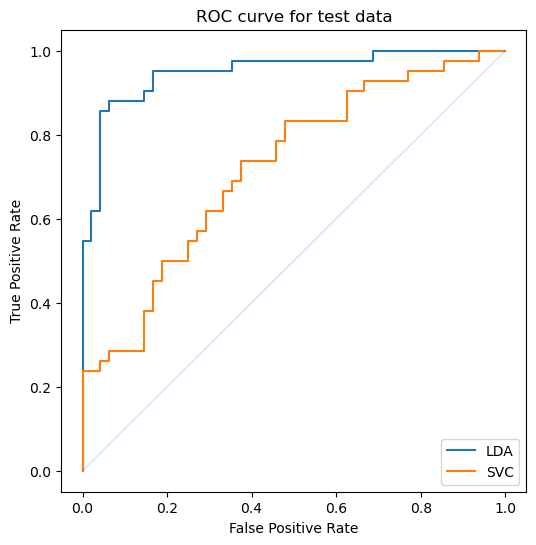

In [19]:
# 将LDA和SVC进行对比
plt.figure(figsize = (6,6))
plt.plot(fpr_lda,tpr_lda,label="LDA")
plt.plot(fpr_svc,tpr_svc,label="SVC")
plt.plot([0,1],[0,1],alpha = 0.1,c = 'b')

plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for test data')
plt.show()

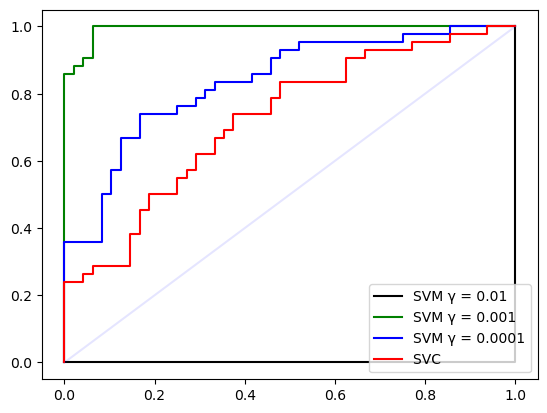

In [20]:
#将支持向量分类器（SVC）与高斯径向基核函数的支持向量机（SVM）进行对比，gamma分别取0.01，0.001，0.0001
fpr_list = []
tpr_list = []
for c in [0.01,0.001,0.0001]:
    svm = SVC(kernel='rbf',probability=True,gamma=c,C=10)
    svm.fit(X_test,y_test)
    

    svm_probs = svm.predict_proba(X_test)[::,1]
    fpr, tpr, _ = roc_curve(y_test, svm_probs)
    fpr_list.append(fpr)
    tpr_list.append(tpr)


plt.plot(fpr_list[0],tpr_list[0],label = 'SVM γ = 0.01',c = 'black')
plt.plot(fpr_list[1],tpr_list[1],label = 'SVM γ = 0.001',c = 'green')
plt.plot(fpr_list[2],tpr_list[2],label = 'SVM γ = 0.0001',c = 'blue')
plt.plot(fpr_svc,tpr_svc,label="SVC ",c = 'r')

plt.legend(loc=4)
plt.plot([0,1],[0,1],alpha = 0.1,c = 'b')

plt.show()

In [21]:
# 用网格搜索（Grid Search）为支持向量机调参
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
"""GridSearchCV:
   Parameters
   ----------
   estimator : estimator object.
   param_grid : dict or list of dictionaries
      Dictionary with parameters names (string) as keys and lists of
      parameter settings to try as values, or a list of such
      dictionaries.
   scoring : string, callable, list/tuple, dict or None, default: None
      A single string (see :ref:`scoring_parameter`) or a callable
      (see :ref:`scoring`) to evaluate the predictions on the test set.
   n_jobs : int or None, optional (default=None)
      Number of jobs to run in parallel.
   cv : int, cross-validation generator or an iterable, optional
      Determines the cross-validation splitting strategy.
       
   Attributes
   ----------     
   best_score_ : float
      Mean cross-validated score of the best_estimator
   best_params_ : dict
      Parameter setting that gave the best results on the hold out data.
"""
param_range_C = [1.0, 10.0, 100.0, 1000.0]
param_range_gamma = [0.0001, 0.001, 0.01, 0.1]
param_grid = [{'C': param_range_C,    ##对高斯径向基核函数支持向量机，对C和gamma调优
               'gamma': param_range_gamma, 
               'kernel': ['rbf']}]
# 一共有64种参数取值组合
gs = GridSearchCV(estimator=SVC(random_state=1), 
                  param_grid=param_grid, 
                  scoring='roc_auc', ##用以评估的标准是roc曲线下面积
                  cv=10,  ##10折交叉验证 也就是说，共做64次网格搜寻，每格里面做一套10折交叉验证
                  n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)  ##输出最优的准确率
print(gs.best_params_)  ##输出达到最优准确率时的参数组合

0.8043434343434344
{'C': 100.0, 'gamma': 0.0001, 'kernel': 'rbf'}


### 9.4 多类别的支持向量机

###  9.4.1 一对一（One-Versus-One，简称 OVO）

#### **做法：**

- 如果我们有 $K$ 个类别，就构建 $\binom{K}{2} = \dfrac{K(K-1)}{2}$ 个分类器。
- 每个分类器只负责“比较两个类别”。
  - 比如：比较“猫 vs 狗”，然后“猫 vs 鸟”，再“狗 vs 鸟”……

---

#### **举例（假设有 3 类）：**

- 构建：
  - SVM1：猫 vs 狗
  - SVM2：猫 vs 鸟
  - SVM3：狗 vs 鸟

- 每个分类器都只看两类数据。

---

#### **预测时：**

- 每个 SVM 给出一个“票”；
- **谁被投票最多，就预测为那一类。**


### 📌 9.4.2 一对多（One-Versus-All，简称 OVA）

#### **做法：**

- 构建 $K$ 个 SVM，每个负责判断“是否属于该类别”。
  - 第 1 个模型：是“猫”还是“非猫”
  - 第 2 个模型：是“狗”还是“非狗”
  - 第 3 个模型：是“鸟”还是“非鸟”

---

#### **预测时：**

- 每个 SVM 都输出一个打分 $f_k(x)$，表示“属于类别 $k$ 的信心”；
- 选择得分最高的类别作为预测结果。

---

✅ **优点：**

- 只需要构建 $K$ 个模型（比 OVO 少）。

---

### 🧮 数学形式（OVA）

$$
f_k(x^*) = \beta_{0k} + \beta_{1k} x^*_1 + \cdots + \beta_{pk} x^*_p
$$

- 对每个 $k = 1, \dots, K$ 都有一套参数；
- 最终选择得分最大的 $k$。


In [33]:
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix
import pandas as pd
x = np.random.randn(250,2)
cut = sample(range(0,250), 2)
y = [0] * min(cut) + [1] * (max(cut) - min(cut)) + [2] * (250 - max(cut))
index = [i==0 | i==2  for i in y]
x[index,:] = x[index,:]+2

<module 'matplotlib.pyplot' from 'C:\\anaconda\\Lib\\site-packages\\matplotlib\\pyplot.py'>

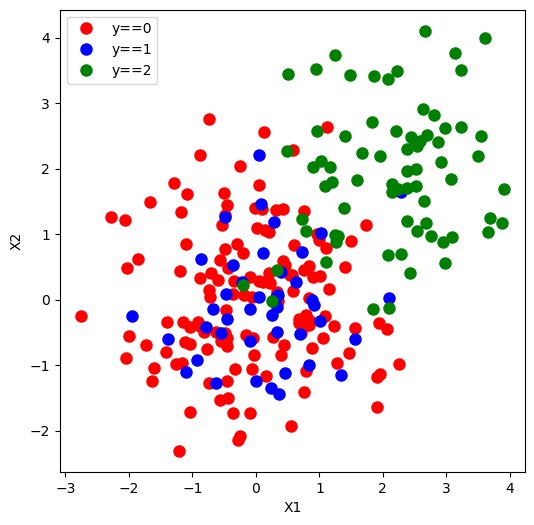

In [34]:
def plot_data1(X, y, type_list):
    plt.figure(figsize=(6, 6))
    pos = np.where(y == type_list[0])
    neg = np.where(y == type_list[1])
    mid = np.where(y == type_list[2])
    p1, = plt.plot(np.ravel(X[pos, 0]), np.ravel(X[pos, 1]), 'o', color = 'red', markersize=8)
    p2, = plt.plot(np.ravel(X[neg, 0]), np.ravel(X[neg, 1]), 'o', color = 'blue', markersize=8)
    p3, = plt.plot(np.ravel(X[mid, 0]), np.ravel(X[mid, 1]), 'o', color = 'green', markersize=8)
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.legend([p1, p2, p3], ["y=="+str(type_list[0]), "y=="+str(type_list[1]), "y=="+str(type_list[2])])
    return plt
plot_data1(x, np.ravel(y), [0,1,2])

In [35]:
model = OneVsRestClassifier(svm.SVC(C=10, kernel='rbf', gamma = 1,probability=True))
clt = model.fit(x,y)
yhat = clt.predict(x)

pd.DataFrame(confusion_matrix(y, yhat), index = ['truth 0','truth 1','truth 2'], columns = ['predict 0','predict 1','predict 2'])

,predict 0,predict 1,predict 2
truth 0,130,0,4
truth 1,41,0,2
truth 2,11,0,62
